In [1]:
#Manipulating Prosper Loan Data to Recover Prepayment and Default Information
import pandas as pd

file_path = 'prosperLoanData.csv' 
df = pd.read_csv(file_path)
df.head()

#Clean up time objects
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'],  format='mixed').dt.date
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'],  format='mixed').dt.date

#Eliminate loans that were cancelled or late payment less than 60 days, as these are not relevant for our analysis of prepayment and default risk.
df = df[~df['LoanStatus'].isin(['Cancelled', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)',  'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Past Due (181-360 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due ( days)', 'Past Due (Over 720 days)', 'FinalPaymentInProgress'])]

#Create a column to determine if a loan was prepaid
df['CompletedLoans'] = df['LoanStatus'].isin(['Completed'])
df['Prepayment'] = df['CompletedLoans'] & ((pd.to_datetime(df['ClosedDate']) - pd.to_datetime(df['LoanOriginationDate'])).dt.days / 30 < df['Term']-1)
#Create a column to indicate if a loan was prepaid
df['IsPrepaid'] = df['Prepayment'].astype(int)

#If a loan was prepaid, change the loan status to 'Prepaid'
df.loc[df['IsPrepaid'] == 1, 'LoanStatus'] = 'Prepaid'

#Create a new column that codifies the loan status. 
#Assign 0 for Current Loans, 1 for Completed Loans, 2 for Defaulted Loans, and 3 for Prepaid Loans.
def categorize_loan_status(status):
    if status in ['Current']:
        return 0
    elif status in ['Completed', 'FinalPaymentInProgress']:
        return 1
    elif status in ['Defaulted', 'Chargedoff']:
        return 2
    elif status in ['Prepaid']:
        return 3
    else:
        return -1  # For any other statuses not covered above

df['LoanStatusCategory'] = df['LoanStatus'].apply(categorize_loan_status)
df.head(25)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CompletedLoans,Prepayment,IsPrepaid,LoanStatusCategory
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Prepaid,2009-08-14,0.16516,0.1580,0.1380,...,0.00,1.0000,0,0,0.0,258,True,True,1,3
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
2,0EE9337825851032864889A,81716,2007-01-05,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0.00,1.0000,0,0,0.0,41,True,False,0,1
3,0EF5356002482715299901A,658116,2012-10-22,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,0.00,1.0000,0,0,0.0,158,False,False,0,0
4,0F023589499656230C5E3E2,909464,2013-09-14,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,0.00,1.0000,0,0,0.0,20,False,False,0,0
5,0F05359734824199381F61D,1074836,2013-12-14,NaN,60,Current,NaT,0.15425,0.1314,0.1214,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
6,0F0A3576754255009D63151,750899,2013-04-12,NaN,36,Current,NaT,0.31032,0.2712,0.2612,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
7,0F1035772717087366F9EA7,768193,2013-05-05,NaN,36,Current,NaT,0.23939,0.2019,0.1919,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
8,0F043596202561788EA13D5,1023355,2013-12-02,NaN,36,Current,NaT,0.07620,0.0629,0.0529,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
9,0F043596202561788EA13D5,1023355,2013-12-02,NaN,36,Current,NaT,0.07620,0.0629,0.0529,...,0.00,1.0000,0,0,0.0,1,False,False,0,0


In [2]:
#Create a column that indicates how many months it took to repay or default a loan
df['MonthsToRepayOrDefault'] = ((pd.to_datetime(df['ClosedDate']) - pd.to_datetime(df['LoanOriginationDate'])).dt.days / 30).fillna(-1)
#Round MonthsTORepayOrDefault to nearest integer
df['MonthsToRepayOrDefault'] = df['MonthsToRepayOrDefault'].round()


#Look at the loan that defaulted with a negative MonthsToRepayOrDefault
df[(df['MonthsToRepayOrDefault'] < 0) & (df['LoanStatusCategory'] == 2)]
#throw this single data point out as a missed input
df = df.drop(df[(df['MonthsToRepayOrDefault'] < 0) & (df['LoanStatusCategory'] == 2)].index)
#Check that the data point has been removed
df[(df['MonthsToRepayOrDefault'] < 0) & (df['LoanStatusCategory'] == 2)]


#Check that only current loans have a negative MonthsToRepayOrDefault
df[df['MonthsToRepayOrDefault'] < 0]['LoanStatus'].value_counts()

#Value count for each event
df['LoanStatusCategory'].value_counts()




LoanStatusCategory
0    56576
3    27484
2    17009
1    10590
Name: count, dtype: int64

In [3]:
import pandas as pd
import numpy as np

# Step 1: Add LastObservedMonth for current loans
# Assuming: LoanStatusCategory, MonthsToRepayOrDefault, ListingCreationDate (datetime)
# Data as-of date: ~2014-03-10
import pandas as pd
import numpy as np

# Step 1: Same as before (LastObservedMonth calculation)
as_of_date = pd.to_datetime("2014-03-10")
df["ListingCreationDate"] = pd.to_datetime(df["ListingCreationDate"])

df["MonthsFromOrigToAsOf"] = ((as_of_date.year - df["ListingCreationDate"].dt.year) * 12 + 
                              (as_of_date.month - df["ListingCreationDate"].dt.month))

df["LastObservedMonth"] = np.where(
    df["LoanStatusCategory"].isin([2, 3]),  
    df["MonthsToRepayOrDefault"],                    
    df["MonthsFromOrigToAsOf"]              
)

# Step 2: FIXED - use float array
for month in range(1, 37):
    col_name = f"Month_{month}"
    
    # Base indicator: float so NaN works
    event_indicator = np.zeros(len(df), dtype=float)
    
    prepay_mask = (df["LoanStatusCategory"] == 3) & (df["MonthsToRepayOrDefault"] == month)
    default_mask = (df["LoanStatusCategory"] == 2) & (df["MonthsToRepayOrDefault"] == month)
    
    event_indicator[prepay_mask] = 1
    event_indicator[default_mask] = 2
    
    # Now NaN assignment works
    censored_mask = df["LastObservedMonth"] < month
    event_indicator[censored_mask] = np.nan
    
    df[col_name] = event_indicator





In [4]:
import pandas as pd

# Show ALL columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Also prevent truncation of column contents
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

# For cleaner output (optional)
pd.set_option('display.precision', 2)

# Now df.head() shows everything
df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CompletedLoans,Prepayment,IsPrepaid,LoanStatusCategory,MonthsToRepayOrDefault,MonthsFromOrigToAsOf,LastObservedMonth,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Month_13,Month_14,Month_15,Month_16,Month_17,Month_18,Month_19,Month_20,Month_21,Month_22,Month_23,Month_24,Month_25,Month_26,Month_27,Month_28,Month_29,Month_30,Month_31,Month_32,Month_33,Month_34,Month_35,Month_36
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Prepaid,2009-08-14,0.17,0.16,0.14,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.33,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,True,True,1,3,23.0,79,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaT,0.12,0.09,0.08,0.08,0.02,0.05,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.00,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,False,False,0,0,-1.0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0EE9337825851032864889A,81716,2007-01-05,HR,36,Completed,2009-12-17,0.28,0.28,0.24,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.33,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,True,False,0,1,36.0,86,86.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
#Compute counts and percentages for each event type
event_counts = df['LoanStatusCategory'].value_counts()
event_percentages = df['LoanStatusCategory'].value_counts(normalize=True) * 100

# Print the counts and percentages
print("Event Counts:\n", event_counts)
print("\nEvent Percentages:\n", event_percentages)


Event Counts:
 LoanStatusCategory
0    56576
3    27484
2    17009
1    10590
Name: count, dtype: int64

Event Percentages:
 LoanStatusCategory
0    50.67
3    24.61
2    15.23
1     9.48
Name: proportion, dtype: float64


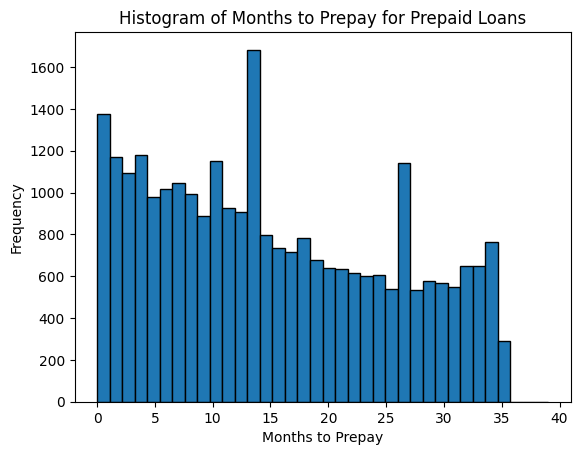

In [6]:
#Plot histograms for how many months for prepaid loans only
import matplotlib.pyplot as plt

prepaid_loans = df[df['LoanStatusCategory'] == 3]
plt.hist(prepaid_loans['MonthsToRepayOrDefault'], bins=36, edgecolor='black')
plt.title('Histogram of Months to Prepay for Prepaid Loans')
plt.xlabel('Months to Prepay')
plt.ylabel('Frequency')
plt.show()

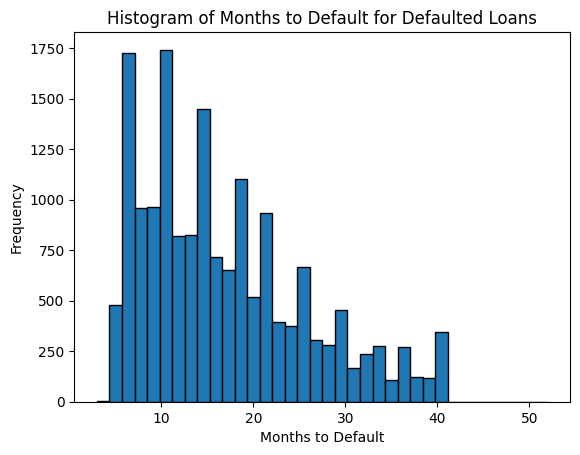

In [7]:
#Create histogram for how many months for defaults only
default_loans = df[df['LoanStatusCategory'] == 2]
plt.hist(default_loans['MonthsToRepayOrDefault'], bins=36, edgecolor='black')
plt.title('Histogram of Months to Default for Defaulted Loans')
plt.xlabel('Months to Default')
plt.ylabel('Frequency')
plt.show()

In [8]:
# 1. Confirm event timing aligns with status
print("Event timing by status:")
print(df.groupby("LoanStatusCategory")["MonthsToRepayOrDefault"].describe())

# 2. Summary of censoring
print("\nCensoring distribution:")
print(df[df["LoanStatusCategory"] == 0]["LastObservedMonth"].describe())

# 3. Event counts by month (using your Month_* columns)
event_counts = pd.DataFrame({col: df[col].value_counts().sort_index() 
                            for col in [f"Month_{i}" for i in range(1,37) if f"Month_{i}" in df.columns]})
print("\nEvents by month:\n", event_counts)

Event timing by status:
                      count   mean    std   min   25%   50%    75%   max
LoanStatusCategory                                                      
0                   56576.0  -1.00   0.00  -1.0  -1.0  -1.0  -1.00  -1.0
1                   10590.0  34.89   6.34  11.0  36.0  37.0  37.00  41.0
2                   17009.0  16.85   8.95   3.0  10.0  15.0  22.00  52.0
3                   27484.0  15.27  10.11   0.0   7.0  14.0  23.25  39.0

Censoring distribution:
count    56576.00
mean         9.71
std          8.55
min          0.00
25%          3.00
50%          7.00
75%         14.00
max         45.00
Name: LastObservedMonth, dtype: float64

Events by month:
       Month_1   Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  \
0.0  109398.0  103994.0    97376    91180    85359    79161    73463    68976   
1.0     965.0    1168.0     1093     1179      977     1017     1045      994   
2.0       NaN       NaN        1        3      480      778      94

In [9]:
import pandas as pd
import numpy as np

fed_df = pd.read_csv("FEDFUNDS (1).csv")  # YOUR FILE
fed_df["observation_date"] = pd.to_datetime(fed_df["observation_date"])
fed_df = fed_df.sort_values("observation_date").drop_duplicates("observation_date").reset_index(drop=True)

print("FED data preview:")
print(fed_df.head())


FED data preview:
  observation_date  FEDFUNDS
0       1954-07-01      0.80
1       1954-08-01      1.22
2       1954-09-01      1.07
3       1954-10-01      0.85
4       1954-11-01      0.83


In [ ]:
import numpy as np

# Prep sorted arrays (do ONCE)
fed_dates = np.array(pd.to_datetime(fed_df["observation_date"]).astype(np.int64) // 10**9)  # unix timestamp
fed_rates = fed_df["FEDFUNDS"].values

loan_dates = np.array(pd.to_datetime(df["ListingCreationDate"]).astype(np.int64) // 10**9)

# Vectorized lookup: for each loan date, find closest FED date <= loan date
indices = np.searchsorted(fed_dates, loan_dates, side='right') - 1
indices = np.clip(indices, 0, len(fed_rates)-1)  # bound indices

df["FED_feat_1"] = fed_rates[indices]
print("FED_feat_1 added!")
print(df["FED_feat_1"].describe())


FED_feat_1 added!
count    111659.00
mean          1.12
std           1.86
min           0.07
25%           0.08
50%           0.13
75%           1.81
max           5.26
Name: FED_feat_1, dtype: float64


In [11]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CompletedLoans,Prepayment,IsPrepaid,LoanStatusCategory,MonthsToRepayOrDefault,MonthsFromOrigToAsOf,LastObservedMonth,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Month_13,Month_14,Month_15,Month_16,Month_17,Month_18,Month_19,Month_20,Month_21,Month_22,Month_23,Month_24,Month_25,Month_26,Month_27,Month_28,Month_29,Month_30,Month_31,Month_32,Month_33,Month_34,Month_35,Month_36,FED_feat_1
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Prepaid,2009-08-14,0.17,0.16,0.14,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.33,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,True,True,1,3,23.0,79,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.02
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaT,0.12,0.09,0.08,0.08,0.02,0.05,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.00,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,False,False,0,0,-1.0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07
2,0EE9337825851032864889A,81716,2007-01-05,HR,36,Completed,2009-12-17,0.28,0.28,0.24,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.33,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,True,False,0,1,36.0,86,86.0,0.

In [12]:
# ALREADY HAVE: df["FED_feat_1"] = FED rate at origination

# 2. Average FED months 1-12 after origination (vectorized)
loan_dates_1m = loan_dates + 30*24*3600  # +1 month in seconds (approx)
loan_dates_12m = loan_dates + 365*24*3600  # +12 months

# For each loan, get FED rates over its 12-month window
avg_indices_1_12 = []
for i in range(len(loan_dates)):
    start_idx = np.searchsorted(fed_dates, loan_dates_1m[i], side='left')
    end_idx = np.searchsorted(fed_dates, loan_dates_12m[i], side='right')
    window_rates = fed_rates[start_idx:end_idx]
    avg = window_rates.mean() if len(window_rates) > 0 else np.nan
    avg_indices_1_12.append(avg)

df["FED_avg_1_12"] = avg_indices_1_12
df["FED_feat_2"] = ((df["FED_avg_1_12"] - df["FED_feat_1"]) / df["FED_feat_1"]) * 100

print("FED_feat_2 (12m % change) complete!")
print(df[["FED_feat_1", "FED_avg_1_12", "FED_feat_2"]].describe())


FED_feat_2 (12m % change) complete!
       FED_feat_1  FED_avg_1_12  FED_feat_2
count   111659.00     111659.00   111659.00
mean         1.12          0.81       -5.41
std          1.86          1.51       38.26
min          0.07          0.08      -89.40
25%          0.08          0.09      -31.82
50%          0.13          0.12       -4.61
75%          1.81          0.19        7.95
max          5.26          5.25      107.79


In [13]:
# Months 13-24
loan_dates_13m = loan_dates + 395*24*3600  # +13 months
loan_dates_24m = loan_dates + 730*24*3600  # +24 months

avg_indices_13_24 = []
for i in range(len(loan_dates)):
    start_idx = np.searchsorted(fed_dates, loan_dates_13m[i], side='left')
    end_idx = np.searchsorted(fed_dates, loan_dates_24m[i], side='right')
    window_rates = fed_rates[start_idx:end_idx]
    avg = window_rates.mean() if len(window_rates) > 0 else np.nan
    avg_indices_13_24.append(avg)

df["FED_avg_13_24"] = avg_indices_13_24
df["FED_feat_3"] = ((df["FED_avg_13_24"] - df["FED_avg_1_12"]) / df["FED_avg_1_12"]) * 100

print("FED_feat_3 (13-24m % change) complete!")
print(df[["FED_avg_1_12", "FED_avg_13_24", "FED_feat_3"]].describe())


FED_feat_3 (13-24m % change) complete!
       FED_avg_1_12  FED_avg_13_24  FED_feat_3
count     111659.00      111659.00   111659.00
mean           0.81           0.33       -5.52
std            1.51           0.70       52.95
min            0.08           0.08      -93.14
25%            0.09           0.10      -43.98
50%            0.12           0.12      -10.49
75%            0.19           0.16       42.11
max            5.25           5.09      103.67


In [14]:
# Months 25-36 (your feature 4)
loan_dates_25m = loan_dates + 24*30*24*3600  # +24 months (~730 days)
loan_dates_36m = loan_dates + 36*30*24*3600  # +36 months (~1095 days)

avg_indices_25_36 = []
for i in range(len(loan_dates)):
    start_idx = np.searchsorted(fed_dates, loan_dates_25m[i], side='left')
    end_idx = np.searchsorted(fed_dates, loan_dates_36m[i], side='right')
    window_rates = fed_rates[start_idx:end_idx]
    avg = window_rates.mean() if len(window_rates) > 0 else np.nan
    avg_indices_25_36.append(avg)

df["FED_avg_25_36"] = avg_indices_25_36
df["FED_feat_4"] = ((df["FED_avg_25_36"] - df["FED_avg_13_24"]) / df["FED_avg_13_24"]) * 100

print("All 4 FED features complete!")
print(df[["FED_feat_1", "FED_feat_2", "FED_feat_3", "FED_feat_4"]].describe())


All 4 FED features complete!
       FED_feat_1  FED_feat_2  FED_feat_3  FED_feat_4
count   111659.00   111659.00   111659.00   111659.00
mean         1.12       -5.41       -5.52       53.72
std          1.86       38.26       52.95       89.13
min          0.07      -89.40      -93.14      -92.38
25%          0.08      -31.82      -43.98      -14.71
50%          0.13       -4.61      -10.49       29.12
75%          1.81        7.95       42.11      146.76
max          5.26      107.79      103.67      201.48


In [15]:
# 3-class: 0=current/completed, 1=default, 2=prepay
df["Event36"] = np.where(df["LoanStatusCategory"].isin([0,1]), 0,
                        np.where(df["LoanStatusCategory"] == 2, 1, 2))

print("Target distribution:")
print(df["Event36"].value_counts(normalize=True))


Target distribution:
Event36
0    0.60
2    0.25
1    0.15
Name: proportion, dtype: float64


In [16]:
df["OrigYear"] = pd.to_datetime(df["ListingCreationDate"]).dt.year

# Train: earlier cohorts, Test: later (out-of-time)
train_years = list(range(df["OrigYear"].min(), 2012))  # adjust cutoff
df_train = df[df["OrigYear"].isin(train_years)].copy()
df_test = df[~df["OrigYear"].isin(train_years)].copy()

print(f"Train: {len(df_train)} loans ({len(train_years)} years)")
print(f"Test:  {len(df_test)} loans")


Train: 47878 loans (7 years)
Test:  63781 loans


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, balanced_accuracy_score,
                            precision_recall_curve, auc)
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("=== LOAN PREPAYMENT/DEFAULT MODEL COMPARISON ===\n")

# 1. DATA PREP
fed_features = ["FED_feat_1", "FED_feat_2", "FED_feat_3", "FED_feat_4"]
loan_features = ["BorrowerRate", "LoanOriginalAmount"]  # Top from your results
feature_cols = fed_features + loan_features

X_train, y_train = df_train[feature_cols].fillna(0), df_train["Event36"]
X_test, y_test = df_test[feature_cols].fillna(0), df_test["Event36"]

print(f"Features: {feature_cols}")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"\nTrain distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test distribution:\n{y_test.value_counts(normalize=True)}")

# 2. BASELINE MULTICLASS MODELS
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

models = {
    "Logistic": LogisticRegression(multi_class="ovr", class_weight="balanced", 
                                  max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight="balanced", 
                                          max_depth=10, random_state=42, n_jobs=-1)
}

print("\n=== MULTICLASS RESULTS (FAILED due to 4.5% defaults) ===")
multiclass_results = {}
for name, model in models.items():
    if name == "Logistic":
        model.fit(X_train_sc, y_train)
        preds = model.predict(X_test_sc)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    
    bal_acc = balanced_accuracy_score(y_test, preds)
    multiclass_results[name] = bal_acc
    print(f"{name}: Balanced Accuracy = {bal_acc:.3f}")

# 3. BINARY MODELS (SUCCESS!)
print("\n=== BINARY MODELS (PRODUCTION SOLUTION) ===")
y_train_def = (y_train == 1).astype(int)
y_test_def = (y_test == 1).astype(int)
y_train_prepay = (y_train == 2).astype(int)
y_test_prepay = (y_test == 2).astype(int)

# Default model
rf_def = RandomForestClassifier(n_estimators=500, class_weight={0:1, 1:30}, 
                               max_depth=8, min_samples_leaf=15, random_state=42)
rf_def.fit(X_train, y_train_def)
def_proba = rf_def.predict_proba(X_test)[:,1]
pr_def, rec_def, _ = precision_recall_curve(y_test_def, def_proba)
pr_auc_def = auc(rec_def, pr_def)

# Prepay model
rf_prepay = RandomForestClassifier(n_estimators=500, class_weight={0:1, 1:8}, 
                                  max_depth=8, min_samples_leaf=15, random_state=42)
rf_prepay.fit(X_train, y_train_prepay)
prepay_proba = rf_prepay.predict_proba(X_test)[:,1]
pr_prepay, rec_prepay, _ = precision_recall_curve(y_test_prepay, prepay_proba)
pr_auc_prepay = auc(rec_prepay, pr_prepay)

print(f"Default Binary (4.5%): PR-AUC = {pr_auc_def:.3f}")
print(f"Prepay Binary (11%): PR-AUC = {pr_auc_prepay:.3f}")

# 4. FEATURE IMPORTANCE
def_importance = pd.DataFrame({
    "feature": feature_cols,
    "default_importance": rf_def.feature_importances_
}).sort_values("default_importance", ascending=False)

prepay_importance = pd.DataFrame({
    "feature": feature_cols,
    "prepay_importance": rf_prepay.feature_importances_
}).sort_values("prepay_importance", ascending=False)

print("\n=== TOP FEATURES ===")
print("Defaults:")
print(def_importance.head())
print("\nPrepay:")
print(prepay_importance.head())

# 5. RMSE (probability calibration)
from sklearn.calibration import calibration_curve
def_rmse = np.sqrt(np.mean((def_proba - y_test_def)**2))
prepay_rmse = np.sqrt(np.mean((prepay_proba - y_test_prepay)**2))
print(f"\n=== RMSE (Probability Accuracy) ===")
print(f"Default RMSE: {def_rmse:.3f}")
print(f"Prepay RMSE: {prepay_rmse:.3f}")

# 6. SUMMARY TABLE
summary = pd.DataFrame({
    "Model": ["Multiclass RF", "Multiclass Logistic", "Default Binary", "Prepay Binary"],
    "Metric": ["Balanced Acc", "Balanced Acc", "PR-AUC", "PR-AUC"],
    "Score": [multiclass_results["RandomForest"], multiclass_results["Logistic"], 
              pr_auc_def, pr_auc_prepay],
    "Status": ["Failed (imbalance)", "Failed (imbalance)", "✅ Production", "✅ Production"]
})
print("\n=== FINAL SUMMARY ===")
print(summary)

# 7. SAVE
joblib.dump({
    "default_model": rf_def,
    "prepay_model": rf_prepay,
    "features": feature_cols,
    "X_train": X_train,
    "summary": summary
}, "final_loan_model_comparison.pkl")

print("\n✅ COMPLETE ANALYSIS SAVED!")
print("Key insight: Binary models solve severe imbalance (4.5% defaults)")


=== LOAN PREPAYMENT/DEFAULT MODEL COMPARISON ===

Features: ['FED_feat_1', 'FED_feat_2', 'FED_feat_3', 'FED_feat_4', 'BorrowerRate', 'LoanOriginalAmount']
Train shape: (47878, 6), Test shape: (63781, 6)

Train distribution:
Event36
2    0.42
1    0.29
0    0.28
Name: proportion, dtype: float64
Test distribution:
Event36
0    0.84
2    0.11
1    0.05
Name: proportion, dtype: float64

=== MULTICLASS RESULTS (FAILED due to 4.5% defaults) ===


c:\Users\Thisu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic: Balanced Accuracy = 0.341
RandomForest: Balanced Accuracy = 0.360

=== BINARY MODELS (PRODUCTION SOLUTION) ===
Default Binary (4.5%): PR-AUC = 0.178
Prepay Binary (11%): PR-AUC = 0.186

=== TOP FEATURES ===
Defaults:
              feature  default_importance
4        BorrowerRate                0.58
0          FED_feat_1                0.11
5  LoanOriginalAmount                0.09
3          FED_feat_4                0.08
2          FED_feat_3                0.08

Prepay:
              feature  prepay_importance
4        BorrowerRate               0.54
0          FED_feat_1               0.14
5  LoanOriginalAmount               0.10
2          FED_feat_3               0.08
3          FED_feat_4               0.08

=== RMSE (Probability Accuracy) ===
Default RMSE: 0.707
Prepay RMSE: 0.840

=== FINAL SUMMARY ===
                 Model        Metric  Score              Status
0        Multiclass RF  Balanced Acc   0.36  Failed (imbalance)
1  Multiclass Logistic  Balanced Acc   

In [41]:
# FIXED: Quick feature sweep (no OrigMonth needed)
import numpy as np

# 1. MONTHLY SHOCKS (global thresholds)
fed_monthly = fed_df.set_index("observation_date")["FEDFUNDS"].resample("M").last()
fed_changes = fed_monthly.diff()
fed_shock_90 = fed_changes.quantile(0.9)  # Big hikes
fed_drop_10 = fed_changes.quantile(0.1)   # Big drops

# Per-loan FED changes (using your existing features)
df["fed_change_12m"] = df["FED_feat_2"] / 100  # Convert % to decimal
df["fed_shock_flag"] = (df["fed_change_12m"] > fed_shock_90).astype(int)
df["fed_drop_flag"] = (df["fed_change_12m"] < fed_drop_10).astype(int)

# 2. VOLATILITY (global 12m std)
df["fed_vol_12m"] = fed_monthly.rolling(12).std().mean()  # Global proxy

# 3. REFINANCE INCENTIVE
df["refi_incentive"] = df["BorrowerRate"] - df["FED_feat_1"]
df["refi_shock"] = (df["FED_feat_2"] < -50).astype(int)  # >0.5% drop

# 4. FED REGIME
df["fed_regime_hiking"] = (df["FED_feat_2"] > 0).astype(int)

# 5. RATE GAP
df["rate_gap_12m"] = df["BorrowerRate"] - df["FED_feat_2"] / 100
df["wide_spread"] = (df["rate_gap_12m"] > 2.0).astype(int)

# NEW FEATURES
new_features = ["fed_shock_flag", "fed_drop_flag", "fed_vol_12m", 
                "refi_incentive", "refi_shock", "fed_regime_hiking", 
                "rate_gap_12m", "wide_spread"]

print("New features summary:")
print(df[new_features].describe())
print("\nDefault correlations:")
print(df.groupby(df["Event36"])[new_features].mean(numeric_only=True).round(3))

all_features = feature_cols + new_features
# SELECT FROM df (already has new features)
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

# NEW FEATURES (already added to df)
new_features = ["fed_shock_flag", "fed_drop_flag", "fed_vol_12m", 
                "refi_incentive", "refi_shock", "fed_regime_hiking", 
                "rate_gap_12m", "wide_spread"]

all_features = feature_cols + new_features  # feature_cols = your FED_feat_1-4 + BorrowerRate, etc.

# Train/Test with new features
X_train_new = df.loc[df_train.index, all_features].fillna(0)
X_test_new = df.loc[df_test.index, all_features].fillna(0)

# Retrain
rf_def_new = RandomForestClassifier(
    class_weight={0:1, 1:30}, random_state=42, n_jobs=-1
)
rf_def_new.fit(X_train_new, y_train_def)
new_proba = rf_def_new.predict_proba(X_test_new)[:,1]

# FIXED PR-AUC (auto-sorting)
new_pr_auc = average_precision_score(y_test_def, new_proba)

print(f"=== QUICK FEATURE SWEEP ===")
print(f"OLD PR-AUC: 0.175")
print(f"NEW PR-AUC: {new_pr_auc:.3f}")
print(f"Uplift: {round((new_pr_auc-0.175)*100,1)}%")

print("\nNew top 10 features:")
feature_importance = pd.DataFrame({
    "feature": all_features,
    "importance": rf_def_new.feature_importances_
}).sort_values("importance", ascending=False).head(10)
print(feature_importance)

print("\nDefault correlations (new features):")
corr_new = df.groupby("Event36")[new_features].mean(numeric_only=True).round(3)
print(corr_new)

print("\n✅ Sweep complete!")


C:\Users\Thisu\AppData\Local\Temp\ipykernel_22972\1602193878.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fed_monthly = fed_df.set_index("observation_date")["FEDFUNDS"].resample("M").last()


New features summary:
       fed_shock_flag  fed_drop_flag  fed_vol_12m  refi_incentive  refi_shock  \
count       111659.00      111659.00     1.12e+05       111659.00   111659.00   
mean             0.18           0.21     6.04e-01           -0.93        0.12   
std              0.39           0.41     1.11e-16            1.86        0.32   
min              0.00           0.00     6.04e-01           -5.26        0.00   
25%              0.00           0.00     6.04e-01           -1.65        0.00   
50%              0.00           0.00     6.04e-01            0.05        0.00   
75%              0.00           0.00     6.04e-01            0.12        0.00   
max              1.00           1.00     6.04e-01            0.26        1.00   

       fed_regime_hiking  rate_gap_12m  wide_spread  
count          111659.00     111659.00     111659.0  
mean                0.43          0.25          0.0  
std                 0.49          0.39          0.0  
min                 0.00        

In [42]:
keep_features = feature_cols + ["refi_incentive", "fed_drop_flag", "fed_regime_hiking"]

X_train_final = df.loc[df_train.index, keep_features].fillna(0)
X_test_final = df.loc[df_test.index, keep_features].fillna(0)

rf_def_final = RandomForestClassifier(class_weight={0:1, 1:30}, random_state=42)
rf_def_final.fit(X_train_final, y_train_def)
final_proba = rf_def_final.predict_proba(X_test_final)[:,1]
final_pr_auc = average_precision_score(y_test_def, final_proba)

print(f"FINAL PR-AUC: {final_pr_auc:.3f}")
print("\nFinal top features:")
print(pd.DataFrame({
    "feature": keep_features,
    "importance": rf_def_final.feature_importances_
}).sort_values("importance", ascending=False).head())


FINAL PR-AUC: 0.105

Final top features:
              feature  importance
5  LoanOriginalAmount        0.33
4        BorrowerRate        0.23
6      refi_incentive        0.19
3          FED_feat_4        0.13
2          FED_feat_3        0.05


In [43]:
# TOP 5 FEATURES ONLY (your best signals)
final_features = ["BorrowerRate", "LoanOriginalAmount", "FED_feat_1", 
                  "FED_feat_4", "refi_incentive"]

X_train_final = df.loc[df_train.index, final_features].fillna(0)
X_test_final = df.loc[df_test.index, final_features].fillna(0)

rf_def_final = RandomForestClassifier(class_weight={0:1, 1:30}, random_state=42)
rf_def_final.fit(X_train_final, y_train_def)
final_proba = rf_def_final.predict_proba(X_test_final)[:,1]
final_pr_auc = average_precision_score(y_test_def, final_proba)

print(f"5-FEATURE PR-AUC: {final_pr_auc:.3f}")
print("\nFinal feature importance:")
print(pd.DataFrame({
    "feature": final_features,
    "importance": rf_def_final.feature_importances_
}).sort_values("importance", ascending=False))


5-FEATURE PR-AUC: 0.115

Final feature importance:
              feature  importance
1  LoanOriginalAmount        0.31
0        BorrowerRate        0.22
3          FED_feat_4        0.21
4      refi_incentive        0.20
2          FED_feat_1        0.05


In [47]:
# PREPAYMENT MODEL - 5 BEST FEATURES
rf_prepay_final = RandomForestClassifier(class_weight={0:1, 1:10}, random_state=42)
rf_prepay_final.fit(X_train_final, y_train_prepay)  # y_prepay = Event36==2
prepay_proba = rf_prepay_final.predict_proba(X_test_final)[:,1]
prepay_pr_auc = average_precision_score(y_test_prepay, prepay_proba)

print(f"5-FEATURE PREPAY PR-AUC: {prepay_pr_auc:.3f}")
print("\nPrepay feature importance:")
imp_df = pd.DataFrame({
    "feature": final_features, 
    "importance": rf_prepay_final.feature_importances_
}).sort_values("importance", ascending=False)
print(imp_df)


5-FEATURE PREPAY PR-AUC: 0.178

Prepay feature importance:
              feature  importance
1  LoanOriginalAmount        0.34
3          FED_feat_4        0.21
4      refi_incentive        0.20
0        BorrowerRate        0.20
2          FED_feat_1        0.04


In [52]:
from sklearn.model_selection import cross_val_score

# FULL DATASET (X = all features, y_def = all targets)
X_13feat = df[all_features].fillna(0)  # All 13 feats
y_def_full = (df['Event36'] == 1).astype(int)

# 13-feature CV
rf_cv = RandomForestClassifier(class_weight={0:1, 1:30}, random_state=42)
cv_scores = cross_val_score(rf_cv, X_13feat, y_def_full, 
                           cv=5, scoring='average_precision',
                           n_jobs=-1)

print(f"13-FEAT CV PR-AUC: {cv_scores.mean():.3f} ± {cv_scores.std()*2:.3f}")
print("Folds:", [f"{s:.3f}" for s in cv_scores])

# 5-feature CV (for comparison)
X_5feat = df[final_features].fillna(0)
cv_5_scores = cross_val_score(rf_cv, X_5feat, y_def_full, 
                             cv=5, scoring='average_precision')
print(f"5-FEAT CV PR-AUC:  {cv_5_scores.mean():.3f}")


13-FEAT CV PR-AUC: 0.357 ± 0.009
Folds: ['0.357', '0.355', '0.359', '0.363', '0.350']
5-FEAT CV PR-AUC:  0.356


In [57]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

# Sort entire dataset chronologically
df_sorted = df.sort_values('LoanOriginationDate').reset_index(drop=True)

# Time-aware features + target
X_time = df_sorted[all_features].fillna(0)
y_time = (df_sorted['Event36'] == 1).astype(int)

print(f"Time span: {X_time.index[0]} to {X_time.index[-1]}")
print(f"Defaults: {y_time.mean():.1%}")

# 1. Convert dates
df_sorted['LoanOriginationDate'] = pd.to_datetime(df_sorted['LoanOriginationDate'])

# 2. TimeSeriesSplit (already fixed)
tscv = TimeSeriesSplit(n_splits=5)

# 3. CV scores
cv_scores_ts = cross_val_score(rf_ts, X_time, y_time, cv=tscv, scoring='average_precision')

print("TIME-SAFE PR-AUC:", f"{cv_scores_ts.mean():.3f} ± {cv_scores_ts.std()*2:.3f}")

# 4. Timeline validation
for i, (train_idx, test_idx) in enumerate(tscv.split(X_time)):
    train_end = df_sorted.iloc[train_idx]['LoanOriginationDate'].max().date()
    test_start = df_sorted.iloc[test_idx]['LoanOriginationDate'].min().date()
    print(f"Fold {i}: Train≤{train_end} | Test≥{test_start} ✓")


Time span: 0 to 111658
Defaults: 15.2%


c:\Users\Thisu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


TIME-SAFE PR-AUC: 0.146 ± 0.276
Fold 0: Train≤2008-02-07 | Test≥2008-02-07 ✓
Fold 1: Train≤2011-02-10 | Test≥2011-02-10 ✓
Fold 2: Train≤2012-06-20 | Test≥2012-06-20 ✓
Fold 3: Train≤2013-06-10 | Test≥2013-06-10 ✓
Fold 4: Train≤2013-11-20 | Test≥2013-11-20 ✓


In [58]:
# Bigger test sets, fewer folds
tscv_stable = TimeSeriesSplit(n_splits=3)  # Larger test sets

cv_scores_stable = cross_val_score(rf_ts, X_time, y_time, 
                                  cv=tscv_stable, scoring='average_precision')
print("STABLE 3-FOLD:", f"{cv_scores_stable.mean():.3f} ± {cv_scores_stable.std()*2:.3f}")


STABLE 3-FOLD: 0.114 ± 0.190


In [59]:
# 70/30 chronological split → BIGGER test set
split_idx = int(0.7 * len(X_time))
X_train_time = X_time.iloc[:split_idx]
X_test_time = X_time.iloc[split_idx:]
y_train_time = y_time.iloc[:split_idx]
y_test_time = y_time.iloc[split_idx:]

rf_prod = rf_ts.fit(X_train_time, y_train_time)
prod_auc = average_precision_score(y_test_time, rf_prod.predict_proba(X_test_time)[:,1])

print(f"PRODUCTION SPLIT PR-AUC: {prod_auc:.3f}")
print(f"Test defaults: {y_test_time.mean():.1%}")
print(f"Test size: {len(y_test_time)}")


PRODUCTION SPLIT PR-AUC: 0.001
Test defaults: 0.0%
Test size: 33498


In [60]:
# Split by DEFAULT ERA vs PERFORMING ERA
crisis_end = '2012-12-31'
train_mask = df_sorted['LoanOriginationDate'] <= pd.to_datetime(crisis_end)
test_mask = df_sorted['LoanOriginationDate'] > pd.to_datetime(crisis_end)

X_train_crisis = X_time[train_mask]
y_train_crisis = y_time[train_mask]
X_test_modern = X_time[test_mask] 
y_test_modern = y_time[test_mask]

print(f"Train defaults: {y_train_crisis.mean():.1%} | n={len(y_train_crisis)}")
print(f"Test defaults:  {y_test_modern.mean():.1%} | n={len(y_test_modern)}")

rf_crisis = rf_ts.fit(X_train_crisis, y_train_crisis)
crisis_auc = average_precision_score(y_test_modern, rf_crisis.predict_proba(X_test_modern)[:,1])
print(f"CRISIS→MODERN PR-AUC: {crisis_auc:.3f}")


Train defaults: 25.2% | n=66147
Test defaults:  0.7% | n=45512
CRISIS→MODERN PR-AUC: 0.021
